In [17]:
from qiskit import QuantumCircuit, transpile
from qiskit.providers.fake_provider import FakeVigoV2
from qiskit.providers.aer import Aer
from experiment import SparsePauliTomographyExperiment as bcexperiment
from matplotlib import pyplot as plt
import cProfile
import pstats
plt.style.use("ggplot")

backend = FakeVigoV2()

In [18]:
def executor(circuits):
    return backend.run(circuits).result().get_counts()

In [19]:
qc = QuantumCircuit(5)
qc.h(1)
qc.cx(0,1)
qc.h(0)
qc.cx(3,4)
qc.x(0)
qc.z(2)
qc.z(3)
qc.draw()

┌───┐┌───┐
q_0: ───────■──┤ H ├┤ X ├
     ┌───┐┌─┴─┐└───┘└───┘
q_1: ┤ H ├┤ X ├──────────
     ├───┤└───┘          
q_2: ┤ Z ├───────────────
     └───┘┌───┐          
q_3: ──■──┤ Z ├──────────
     ┌─┴─┐└───┘          
q_4: ┤ X ├───────────────
     └───┘

In [20]:
experiment = bcexperiment(qc, [0,1,2,3,4], backend)

In [21]:
experiment.generate(50, 50, [2,4,16])

In [22]:
experiment.run(executor)

In [23]:
experiment.analyze()

In [24]:
layer1, = experiment.analysis.noise_profiles()

<AxesSubplot:>

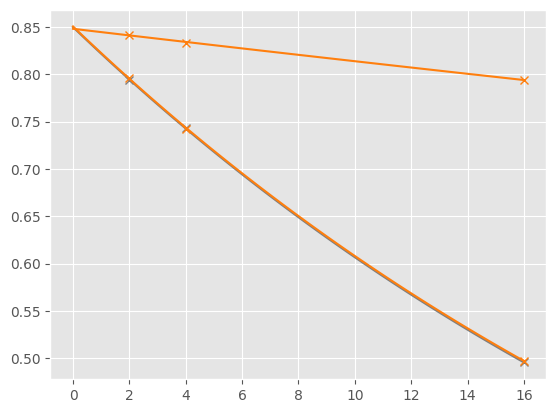

In [46]:
layer1.graph(0)

<AxesSubplot:>

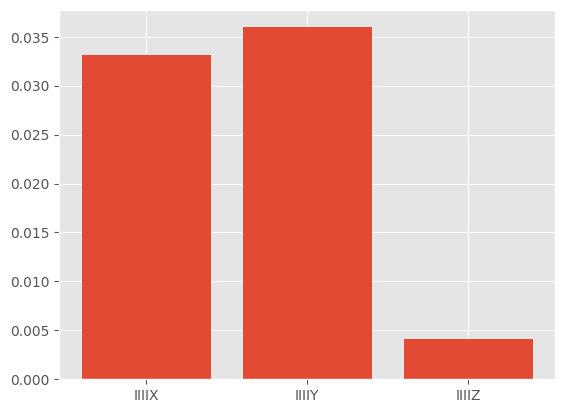

In [47]:
layer1.plot_infidelitites(0)

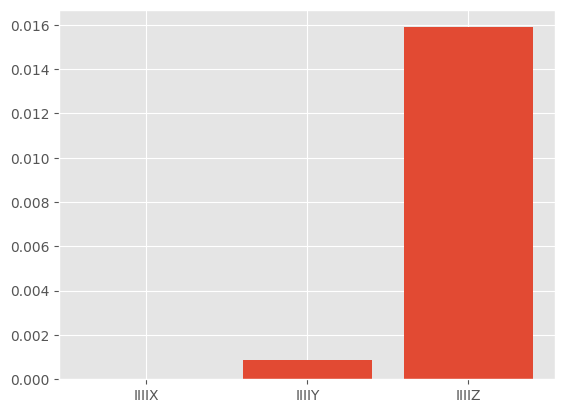

In [48]:
layer1.plot_coeffs(0)